# 2월 RF 분석

In [1]:
import pandas as pd
raw_hourly_df = pd.read_csv("sj_hourly_rainfall_case1.csv")
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
raw_hourly_df['month'] = pd.DatetimeIndex(raw_hourly_df['date']).month_name()
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm,month
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October


In [3]:
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "January"]
raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "February"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "March"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "April"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "May"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "June"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "July"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "August"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "September"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "October"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "November"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "December"]

## 1. 4001430 Station Random Forest 분석

In [4]:
st_code = "4001430"
x_col = st_code + "_gpm"
y_col = st_code

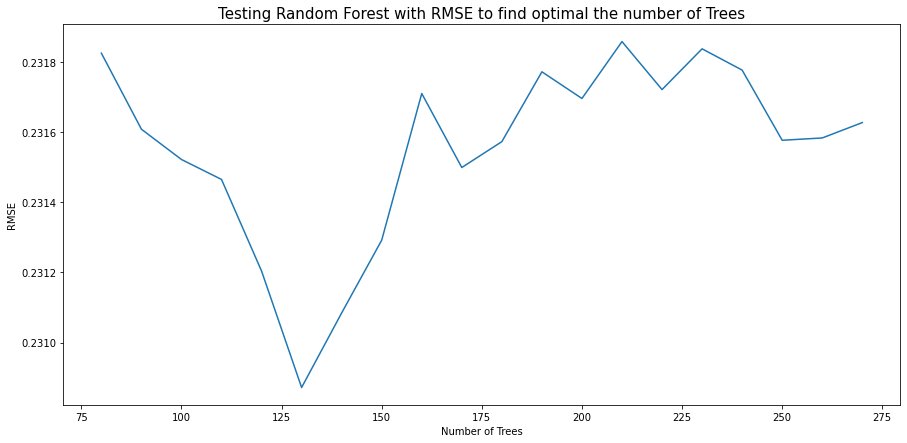

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

rmse_scores = []
estimators = []
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

rf = RandomForestRegressor(warm_start=True, random_state=2, n_jobs=-1)

est = 80

for i in range(20):
    rf.set_params(n_estimators=est)
    rf.fit(X, y)
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
    
    rmse_scores.append(rmse)
    estimators.append(est)
    
    est += 10
    
plt.figure(figsize=(15, 7))
plt.plot(estimators, rmse_scores)

plt.xlabel("Number of Trees")
plt.ylabel("RMSE")

plt.title("Testing Random Forest with RMSE to find optimal the number of Trees", fontsize="15")
plt.show()

### Case-1 적용 RF

In [6]:
est_jan=130
cv_num = 20

rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X = raw_hourly_df[[x_col]]
y = raw_hourly_df[y_col]

In [7]:
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-5.72558332e-03, -3.57711490e-02, -2.49591609e-02, -8.02052390e-02,
       -1.21993832e-01, -7.30431226e-02, -1.10696201e-02, -1.82719580e-01,
       -2.72529005e-04, -4.98266347e-03, -2.71665764e-04, -3.24038606e-01,
       -3.20926644e-03, -6.10716179e-02, -2.96834000e-03, -9.47039890e-02,
       -1.37650663e-01, -7.77186284e-02, -7.95755807e-03, -6.27110876e-02])

In [8]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.076 0.189 0.158 0.283 0.349 0.27  0.105 0.427 0.017 0.071 0.016 0.569
 0.057 0.247 0.054 0.308 0.371 0.279 0.089 0.25 ]
RMSE 평균: 0.209


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
from scipy import stats
from sklearn import linear_model

def density_scatter(x , y, st, bins=20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111)
    data, x_e, y_e = np.histogram2d(x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, **kwargs )
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 
    ax.set_title('Ground Rainfall Prediction \n using IMERG in the Station: %i' %st , fontsize=18)
    ax.set_xlabel('Prediction (mm/h)', fontsize=18)
    ax.set_ylabel('Station Observation (mm/h)', fontsize=18)
    xt = [0, 2, 4, 6, 8, 10, 12, 14]
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 15])
    ax.set_xticklabels(xt, fontsize=18)
    ax.set_yticklabels(xt, fontsize=18)

    x_pred = np.linspace(0, 20, 2)            
    x_pred = x_pred.reshape(-1, 1)  
    y_pred = model.predict(x_pred)

    ax.plot(x_pred, y_pred, color='k')
    ax.text(0.55, 0.2, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


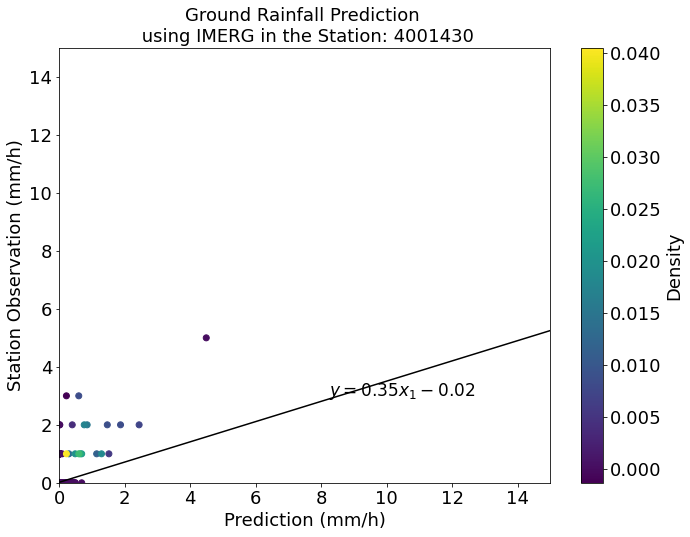

In [10]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [11]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.88353322, -1.13818534, -0.23151384, -0.74273576, -0.32662814,
       -0.11112479, -0.70580337, -0.84329815, -1.07417833, -0.58428837,
       -0.17390181, -1.72660511, -2.73415945, -0.62866771, -0.77035577,
       -1.26364449, -0.38146963, -1.0108497 , -0.05429133, -1.46125085])

In [12]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.94  1.067 0.481 0.862 0.572 0.333 0.84  0.918 1.036 0.764 0.417 1.314
 1.654 0.793 0.878 1.124 0.618 1.005 0.233 1.209]
RMSE 평균: 0.853
제거된 0의 비율: 96.843


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


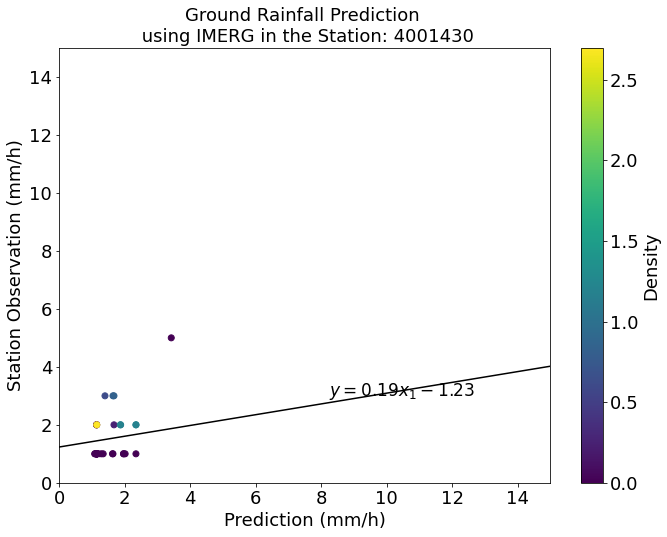

In [13]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [14]:
rmse_case1_all = []
rmse_case2_all = []
zero_count_ratio = []
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 2. 4001440 Station Random Forest 분석

### Case-1 적용 RF

In [15]:
st_code = "4001440"
x_col = st_code + "_gpm"
y_col = st_code

In [16]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.06262764, -0.07198247, -0.08323613, -0.109259  , -0.04697525,
       -0.03724405, -0.09074108, -0.14212747, -0.01977524, -0.12397039,
       -0.10068557, -0.03346374, -0.09717153, -0.08161743, -0.09148494,
       -0.11407454, -0.14307552, -0.12978308, -0.04949145, -0.11983332])

In [17]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.25  0.268 0.289 0.331 0.217 0.193 0.301 0.377 0.141 0.352 0.317 0.183
 0.312 0.286 0.302 0.338 0.378 0.36  0.222 0.346]
RMSE 평균: 0.288


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


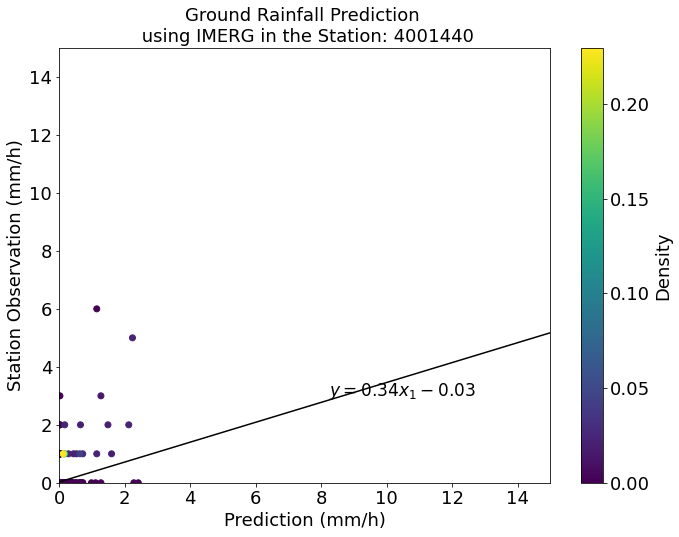

In [18]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [19]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.1900336 , -2.61800815, -2.14769484, -0.5146386 , -0.30767295,
       -0.03159766, -0.36578003, -0.80131649, -0.42704662, -3.3569808 ,
       -0.20147667, -0.37383469, -0.53535668, -0.27072855, -0.02235017,
       -0.93256447, -0.28401963, -0.19079926, -0.55587547, -2.56507666])

In [20]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.436 1.618 1.466 0.717 0.555 0.178 0.605 0.895 0.653 1.832 0.449 0.611
 0.732 0.52  0.149 0.966 0.533 0.437 0.746 1.602]
RMSE 평균: 0.785
제거된 0의 비율: 96.212


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


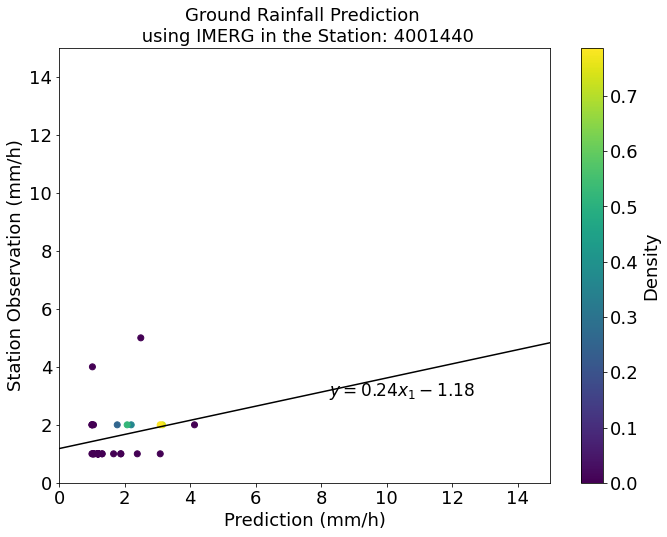

In [21]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [22]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 3. 4001450 Station Random Forest 분석

### Case-1 적용 RF

In [23]:
st_code = "4001450"
x_col = st_code + "_gpm"
y_col = st_code

In [24]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.05488962, -0.06784118, -0.14865713, -0.08523288, -0.10844623,
       -0.08331414, -0.26412909, -0.0817256 , -0.08523958, -0.18741232,
       -0.12555477, -0.17040814, -0.11244298, -0.11125461, -0.13386091,
       -0.14530009, -0.25095202, -0.09057401, -0.15833402, -0.17035439])

In [25]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.234 0.26  0.386 0.292 0.329 0.289 0.514 0.286 0.292 0.433 0.354 0.413
 0.335 0.334 0.366 0.381 0.501 0.301 0.398 0.413]
RMSE 평균: 0.356


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


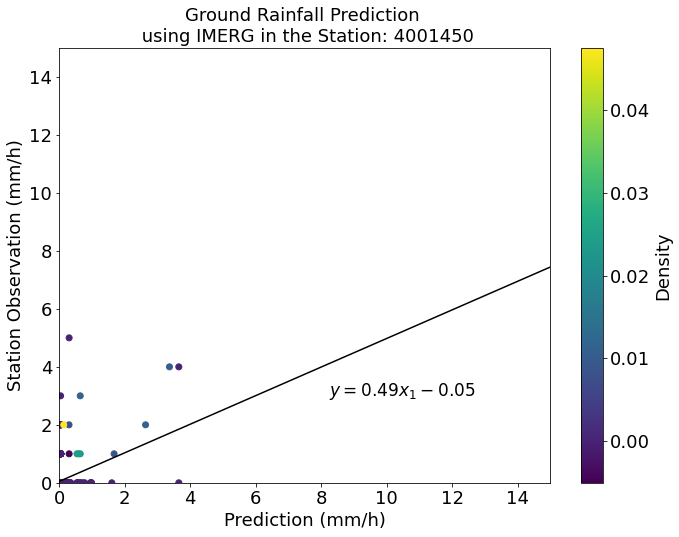

In [26]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [27]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.71273589, -0.77488989, -0.09049461, -0.55855846, -0.81022315,
       -0.12327619, -1.16422235, -1.01685953, -0.65143566, -0.65454828,
       -0.30272761, -0.09645524, -0.10095013, -0.098664  , -0.52658556,
       -0.77584323, -0.09885451, -0.17671899, -0.09883396, -0.098678  ])

In [28]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.844 0.88  0.301 0.747 0.9   0.351 1.079 1.008 0.807 0.809 0.55  0.311
 0.318 0.314 0.726 0.881 0.314 0.42  0.314 0.314]
RMSE 평균: 0.609
제거된 0의 비율: 94.613


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


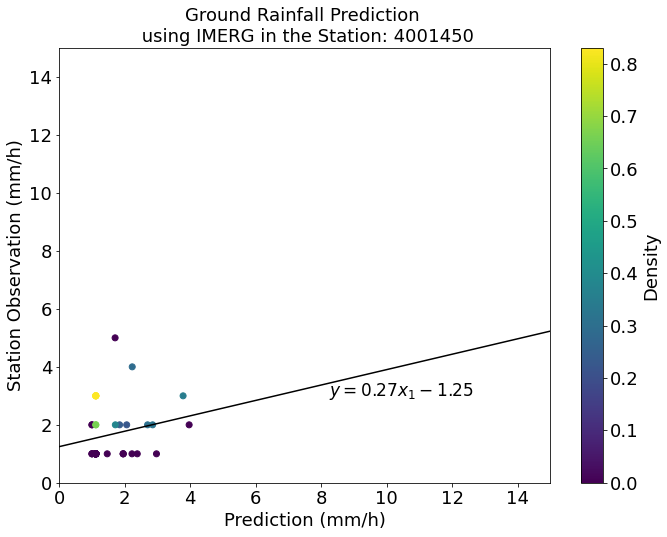

In [29]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [30]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 4. 4003420 Station Random Forest 분석

### Case-1 적용 RF

In [31]:
st_code = "4003420"
x_col = st_code + "_gpm"
y_col = st_code

In [32]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.08546263, -0.05121755, -0.02705155, -0.13970697, -0.05619905,
       -0.05160033, -0.09209576, -0.03136619, -0.02642856, -0.11111972,
       -0.05530848, -0.0528277 , -0.03565419, -0.06378724, -0.04094321,
       -0.08799127, -0.17974201, -0.05259474, -0.05678608, -0.1649772 ])

In [33]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.292 0.226 0.164 0.374 0.237 0.227 0.303 0.177 0.163 0.333 0.235 0.23
 0.189 0.253 0.202 0.297 0.424 0.229 0.238 0.406]
RMSE 평균: 0.260


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


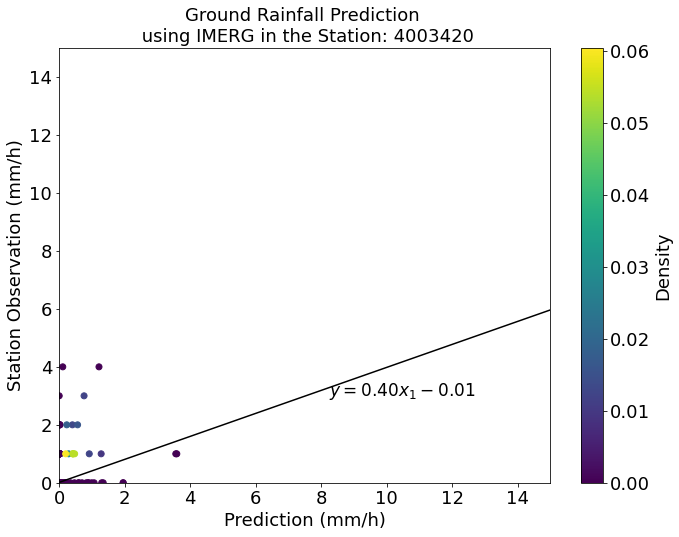

In [34]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [35]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.1679714 , -0.37046084, -0.63414604, -0.99856481, -1.9148816 ,
       -0.23284099, -1.61210282, -2.56135118, -0.13034385, -0.22226214,
       -1.17970886, -0.40378247, -0.70276934, -0.31527411, -0.00528439,
       -1.16821383, -1.74552573, -0.42408331, -0.13668823, -1.09105069])

In [36]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.41  0.609 0.796 0.999 1.384 0.483 1.27  1.6   0.361 0.471 1.086 0.635
 0.838 0.561 0.073 1.081 1.321 0.651 0.37  1.045]
RMSE 평균: 0.802
제거된 0의 비율: 96.886


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


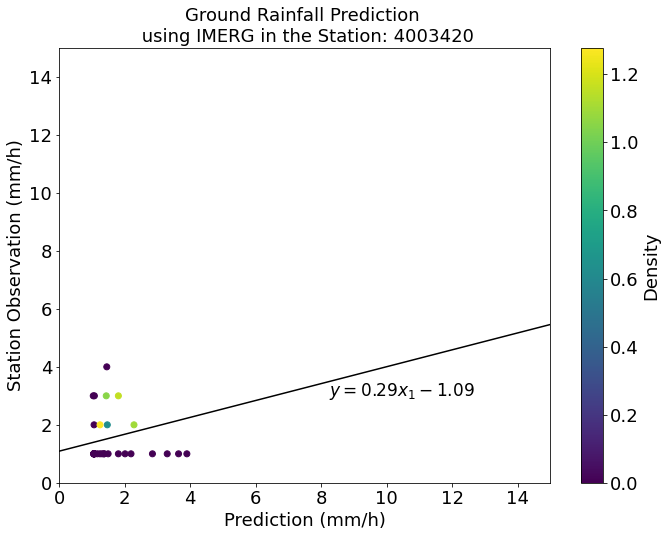

In [37]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [38]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 5. 4007450 Station Random Forest 분석

### Case-1 적용 RF

In [39]:
st_code = "4007450"
x_col = st_code + "_gpm"
y_col = st_code

In [40]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.04482759, -0.10570615, -0.23759806, -0.18712249, -0.10444948,
       -0.30374314, -0.5545771 , -0.03168298, -0.05681236, -0.11040729,
       -0.13361417, -0.16133878, -0.11117816, -0.05171951, -0.17957271,
       -0.1531866 , -0.11386964, -0.09150868, -0.12823635, -0.15320731])

In [41]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.212 0.325 0.487 0.433 0.323 0.551 0.745 0.178 0.238 0.332 0.366 0.402
 0.333 0.227 0.424 0.391 0.337 0.303 0.358 0.391]
RMSE 평균: 0.368


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


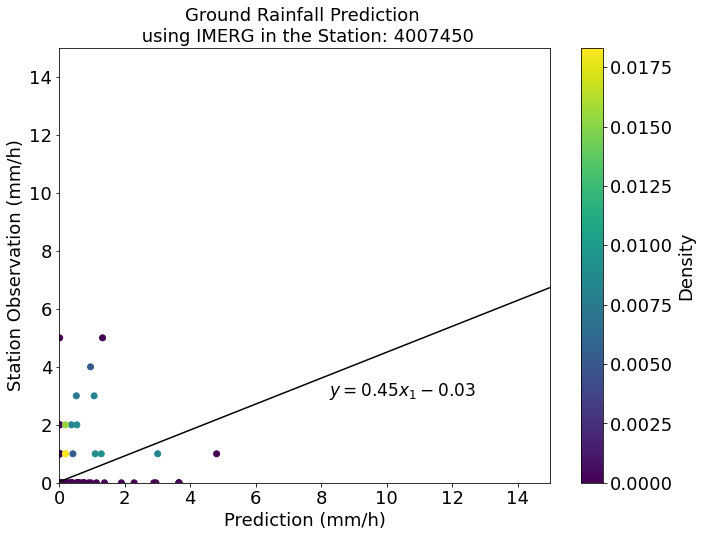

In [42]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [43]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-6.73630531, -3.10960391, -0.11389947, -6.71789811, -0.17346748,
       -2.41080381, -2.09781022, -1.81238219, -1.75512301, -0.07595362,
       -1.17479216, -0.22275962, -0.63091742, -0.15938994, -0.24744093,
       -0.15141953, -1.44955462, -0.13423739, -2.06970828, -0.18396324])

In [44]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.595 1.763 0.337 2.592 0.416 1.553 1.448 1.346 1.325 0.276 1.084 0.472
 0.794 0.399 0.497 0.389 1.204 0.366 1.439 0.429]
RMSE 평균: 1.036
제거된 0의 비율: 97.264


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


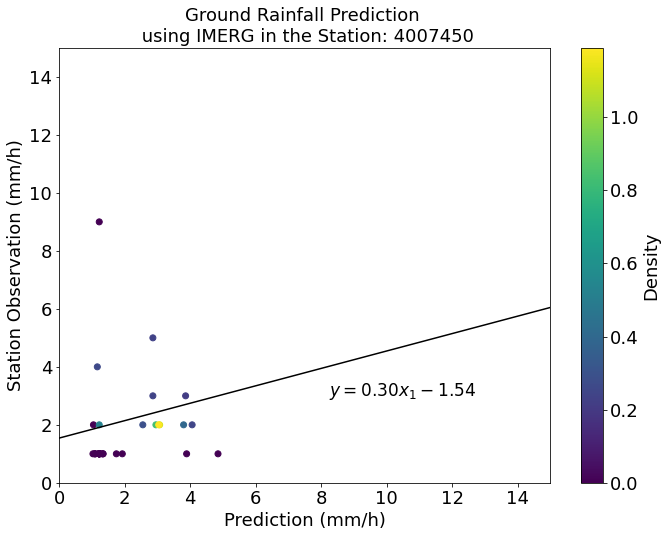

In [45]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [46]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 6. 4007470 Station Random Forest 분석

### Case-1 적용 RF

In [47]:
st_code = "4007470"
x_col = st_code + "_gpm"
y_col = st_code

In [48]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.06602448, -0.06682413, -0.19129866, -0.05360656, -0.09288023,
       -0.11067496, -0.09467241, -0.04092245, -0.03562835, -0.06968569,
       -0.13518537, -0.25514718, -0.14924757, -0.05178077, -0.06053715,
       -0.16905231, -0.07004148, -0.10795472, -0.07064875, -0.29308668])

In [49]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.257 0.259 0.437 0.232 0.305 0.333 0.308 0.202 0.189 0.264 0.368 0.505
 0.386 0.228 0.246 0.411 0.265 0.329 0.266 0.541]
RMSE 평균: 0.316


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


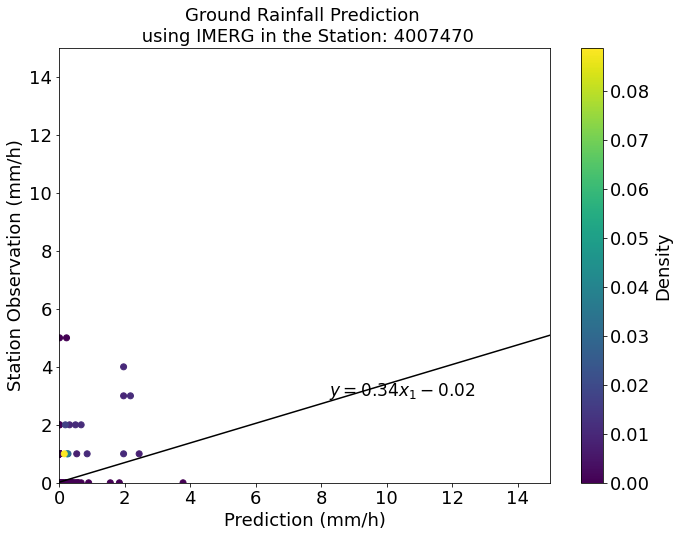

In [50]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [51]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.30350518, -2.52648509, -1.46575128, -0.35384064, -0.63007993,
       -0.35386899, -0.08433867, -0.46866003, -0.90417773, -1.62706749,
       -2.84790632, -0.68606142, -1.35495287, -1.19600999, -6.43087574,
       -0.24840438, -0.5008919 , -0.10598866, -0.37975103, -0.86762952])

In [52]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.142 1.589 1.211 0.595 0.794 0.595 0.29  0.685 0.951 1.276 1.688 0.828
 1.164 1.094 2.536 0.498 0.708 0.326 0.616 0.931]
RMSE 평균: 0.976
제거된 0의 비율: 96.801


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


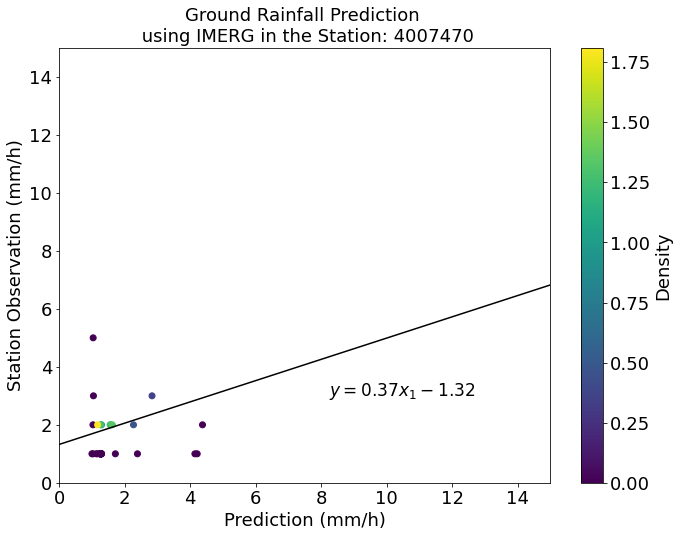

In [53]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [54]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 7. 4007472 Station Random Forest 분석

### Case-1 적용 RF

In [55]:
st_code = "4007472"
x_col = st_code + "_gpm"
y_col = st_code

In [56]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.00500299, -0.08728977, -0.19397952, -0.04333494, -0.08451065,
       -0.0411446 , -0.08803773, -0.04065576, -0.03935934, -0.07047458,
       -0.04308594, -0.09421836, -0.02530303, -0.02913676, -0.07666543,
       -0.12802841, -0.08550155, -0.17675669, -0.05189026, -0.06779039])

In [57]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.071 0.295 0.44  0.208 0.291 0.203 0.297 0.202 0.198 0.265 0.208 0.307
 0.159 0.171 0.277 0.358 0.292 0.42  0.228 0.26 ]
RMSE 평균: 0.258


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


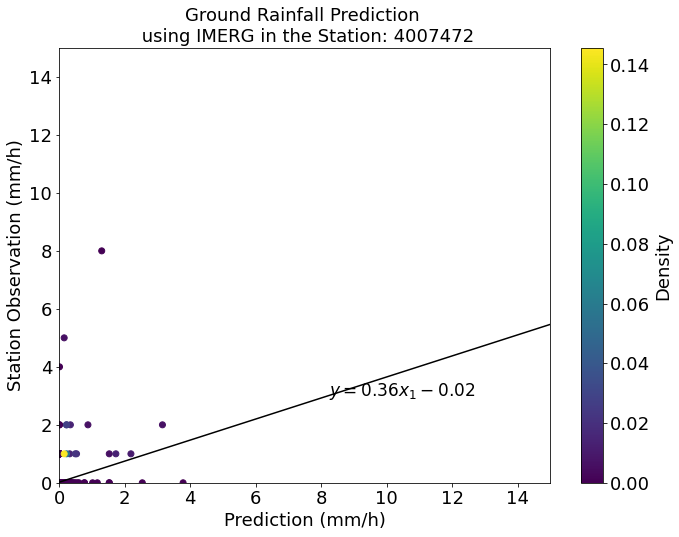

In [58]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [59]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.3004125 , -1.81997667, -2.85921936, -0.88742961, -0.62905385,
       -0.5151316 , -6.94503974, -0.47793969, -0.08516363, -1.01998134,
       -0.05453104, -2.06098133, -0.8383492 , -0.09299799, -0.19455349,
       -1.51915776, -0.33942836, -4.63368586, -0.08578103, -0.01918027])

In [60]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.548 1.349 1.691 0.942 0.793 0.718 2.635 0.691 0.292 1.01  0.234 1.436
 0.916 0.305 0.441 1.233 0.583 2.153 0.293 0.138]
RMSE 평균: 0.920
제거된 0의 비율: 96.907


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


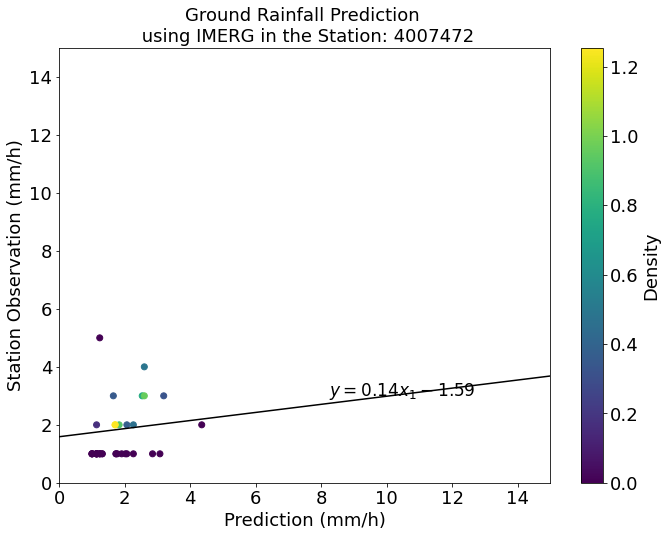

In [61]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [62]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 8. 4007474 Station Random Forest 분석

### Case-1 적용 RF

In [63]:
st_code = "4007474"
x_col = st_code + "_gpm"
y_col = st_code

In [64]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.02623812, -0.07219567, -0.07321804, -0.16929486, -0.23675658,
       -0.07629033, -0.13526947, -0.09954578, -0.10280445, -0.08662044,
       -0.0657315 , -0.23448009, -0.11563753, -0.12047437, -0.18674376,
       -0.26700573, -0.10906528, -0.16351399, -0.15550954, -0.31896906])

In [65]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.162 0.269 0.271 0.411 0.487 0.276 0.368 0.316 0.321 0.294 0.256 0.484
 0.34  0.347 0.432 0.517 0.33  0.404 0.394 0.565]
RMSE 평균: 0.362


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


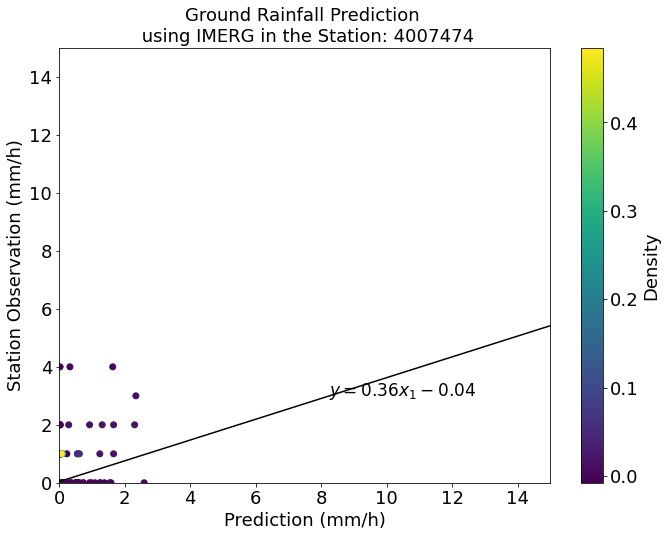

In [66]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [67]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.32928802, -0.5684524 , -1.1538611 , -1.3452451 , -1.60938831,
       -0.61477346, -1.47039726, -4.1170597 , -1.05840166, -0.15039488,
       -0.62192222, -1.04502104, -0.95808188, -1.3197069 , -1.11689449,
       -1.04014676, -0.63550097, -0.53625779, -0.70378269, -1.75196666])

In [68]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.153 0.754 1.074 1.16  1.269 0.784 1.213 2.029 1.029 0.388 0.789 1.022
 0.979 1.149 1.057 1.02  0.797 0.732 0.839 1.324]
RMSE 평균: 1.028
제거된 0의 비율: 96.044


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


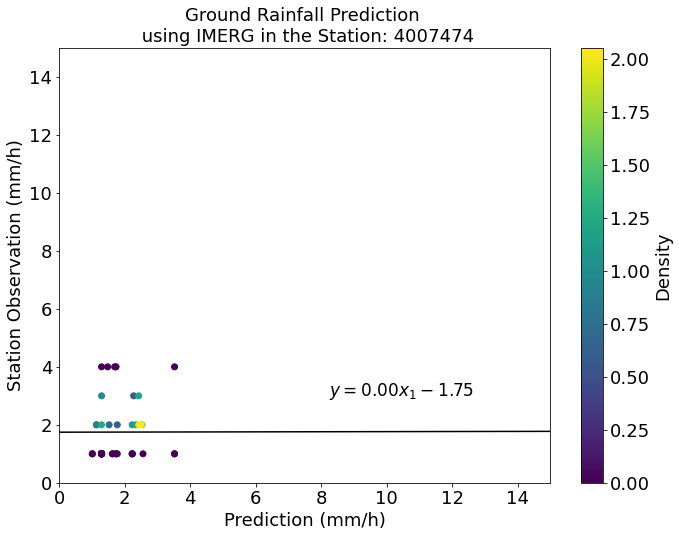

In [69]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [70]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 9. 4009460 Station Random Forest 분석

### Case-1 적용 RF

In [71]:
st_code = "4009460"
x_col = st_code + "_gpm"
y_col = st_code

In [72]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.01298071, -0.02568231, -0.54987766, -0.15188009, -0.06230253,
       -0.12831892, -0.90653226, -0.14591527, -0.05968745, -0.08000258,
       -0.07801459, -0.13383142, -0.03678227, -0.08202937, -0.11064238,
       -0.20489096, -0.17943458, -0.12043387, -0.07899787, -0.16385722])

In [73]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.114 0.16  0.742 0.39  0.25  0.358 0.952 0.382 0.244 0.283 0.279 0.366
 0.192 0.286 0.333 0.453 0.424 0.347 0.281 0.405]
RMSE 평균: 0.362


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


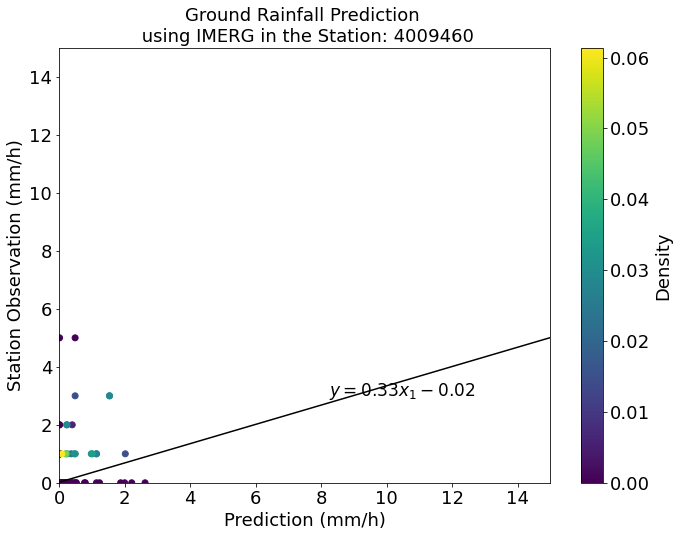

In [74]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [75]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-4.57042975, -4.60560032, -0.59187264, -1.88966116, -0.29965711,
       -0.40437593, -0.71466638, -0.41793015, -7.04059422, -0.17889338,
       -0.38124088, -1.41831886, -2.68143375, -0.13359398, -0.71422797,
       -0.14938454, -0.49256099, -0.35917094, -1.14962527, -0.22194824])

In [76]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.138 2.146 0.769 1.375 0.547 0.636 0.845 0.646 2.653 0.423 0.617 1.191
 1.638 0.366 0.845 0.387 0.702 0.599 1.072 0.471]
RMSE 평균: 1.003
제거된 0의 비율: 97.180


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


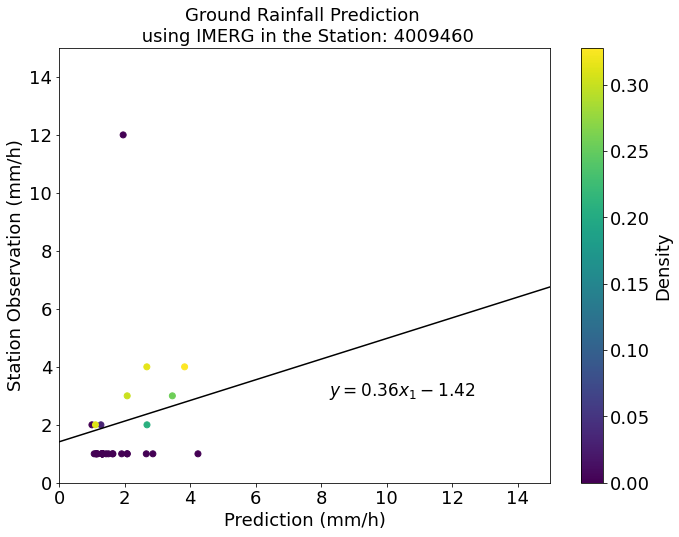

In [77]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [78]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 10. 9000140 Station Random Forest 분석

### Case-1 적용 RF

In [79]:
st_code = "9000140"
x_col = st_code + "_gpm"
y_col = st_code

In [80]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.02768799, -0.06345838, -0.06808573, -0.09543559, -0.12337267,
       -0.04816974, -0.08915362, -0.05921017, -0.02387981, -0.12434705,
       -0.07834573, -0.14574932, -0.09451254, -0.04742195, -0.13546362,
       -0.22894726, -0.04747032, -0.09054478, -0.12014138, -0.29394845])

In [81]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.166 0.252 0.261 0.309 0.351 0.219 0.299 0.243 0.155 0.353 0.28  0.382
 0.307 0.218 0.368 0.478 0.218 0.301 0.347 0.542]
RMSE 평균: 0.302


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


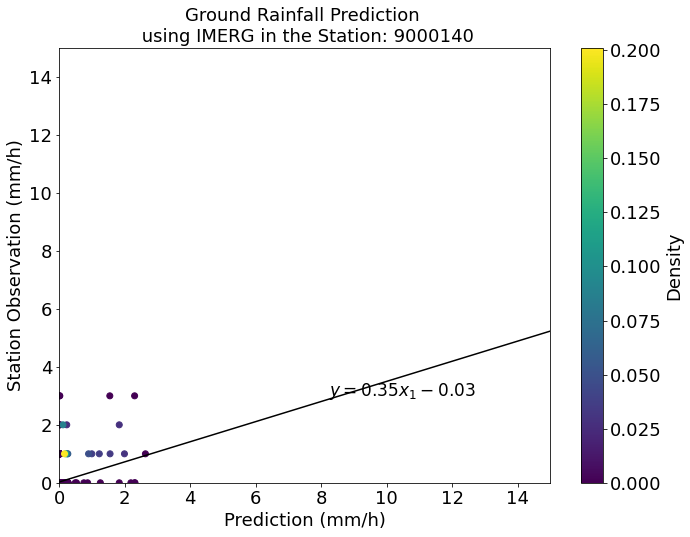

In [82]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [83]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.31201465, -1.28589459, -0.5313544 , -1.87507336, -1.7116483 ,
       -0.66824422, -1.31392732, -0.34172365, -0.57716575, -0.75373606,
       -0.76742859, -0.77766002, -3.00685263, -1.02714618, -0.23361346,
       -0.36137482, -0.59336118, -0.69290015, -1.4895385 , -0.25204659])

In [84]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.559 1.134 0.729 1.369 1.308 0.817 1.146 0.585 0.76  0.868 0.876 0.882
 1.734 1.013 0.483 0.601 0.77  0.832 1.22  0.502]
RMSE 평균: 0.910
제거된 0의 비율: 96.843


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


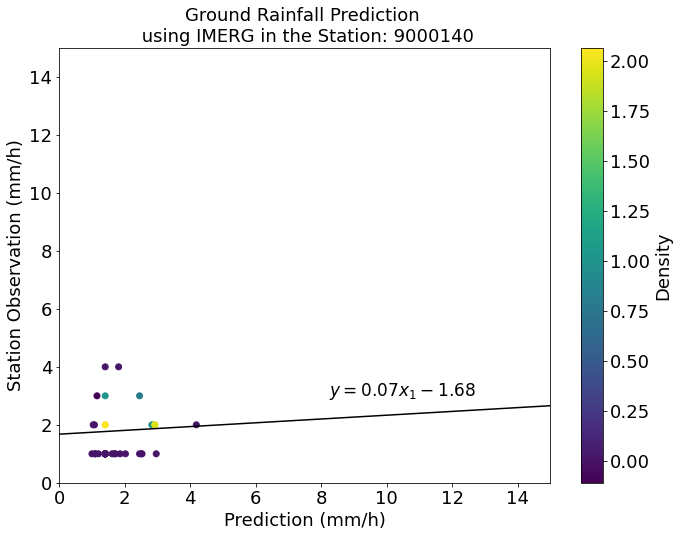

In [85]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [86]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 11. 9000233 Station Random Forest 분석

### Case-1 적용 RF

In [87]:
st_code = "9000233"
x_col = st_code + "_gpm"
y_col = st_code

In [88]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.06101363, -0.13866392, -0.33122391, -0.24611741, -0.14168527,
       -0.14201723, -0.15404524, -0.05491457, -0.08856928, -0.0386715 ,
       -0.08894988, -0.10386508, -0.20163299, -0.28104613, -0.30609503,
       -0.20102219, -0.07847908, -0.22535014, -0.20082328, -0.20656856])

In [89]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.247 0.372 0.576 0.496 0.376 0.377 0.392 0.234 0.298 0.197 0.298 0.322
 0.449 0.53  0.553 0.448 0.28  0.475 0.448 0.454]
RMSE 평균: 0.391


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


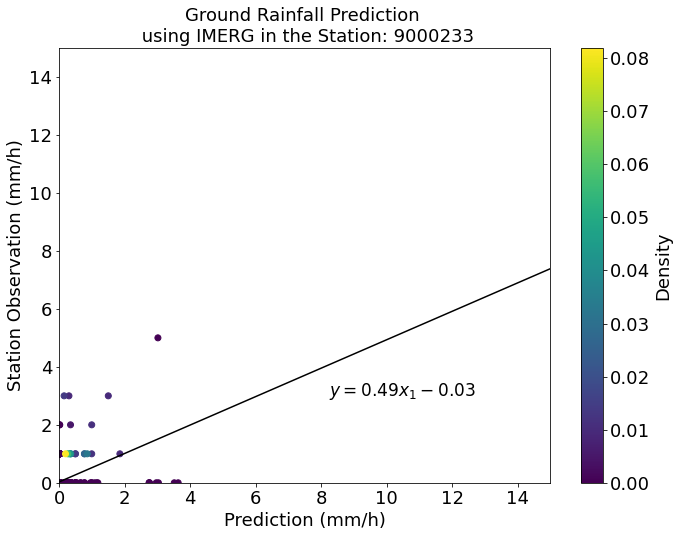

In [90]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [91]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -1.1276631 ,  -0.30585121,  -0.14231138,  -2.45273157,
        -0.86319817,  -1.00426915,  -0.58954659,  -0.40968676,
        -1.65383504,  -0.94078237,  -0.9069083 ,  -0.08495265,
        -0.87908218,  -1.14263743, -10.70685545,  -1.21188721,
        -2.89953953,  -0.20183344,  -0.70897345,  -1.67211531])

In [92]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.062 0.553 0.377 1.566 0.929 1.002 0.768 0.64  1.286 0.97  0.952 0.291
 0.938 1.069 3.272 1.101 1.703 0.449 0.842 1.293]
RMSE 평균: 1.053
제거된 0의 비율: 96.759


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


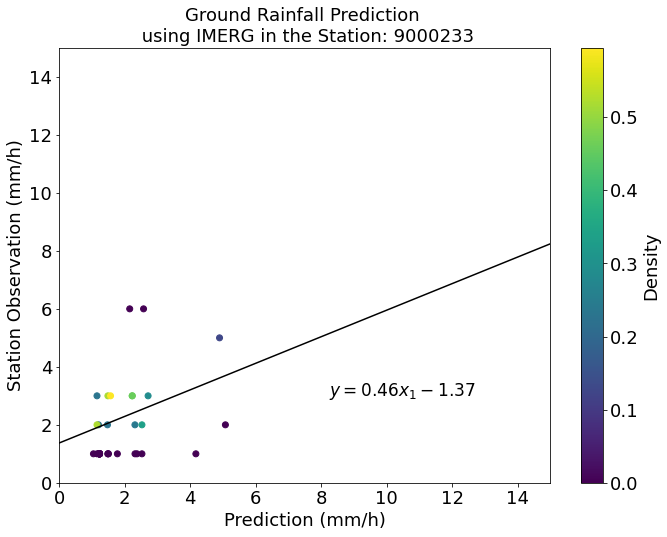

In [93]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [94]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 12. 9000234 Station Random Forest 분석

### Case-1 적용 RF

In [95]:
st_code = "9000234"
x_col = st_code + "_gpm"
y_col = st_code

In [96]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.02827551, -0.1744752 , -0.49310734, -0.24243675, -0.18761486,
       -0.50108324, -0.8058796 , -0.01578124, -0.06020317, -0.18654173,
       -0.27862471, -0.47770013, -0.42462868, -0.07110258, -0.25008366,
       -0.32918313, -0.11647549, -0.06868264, -0.10876403, -0.34822151])

In [97]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.168 0.418 0.702 0.492 0.433 0.708 0.898 0.126 0.245 0.432 0.528 0.691
 0.652 0.267 0.5   0.574 0.341 0.262 0.33  0.59 ]
RMSE 평균: 0.468


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


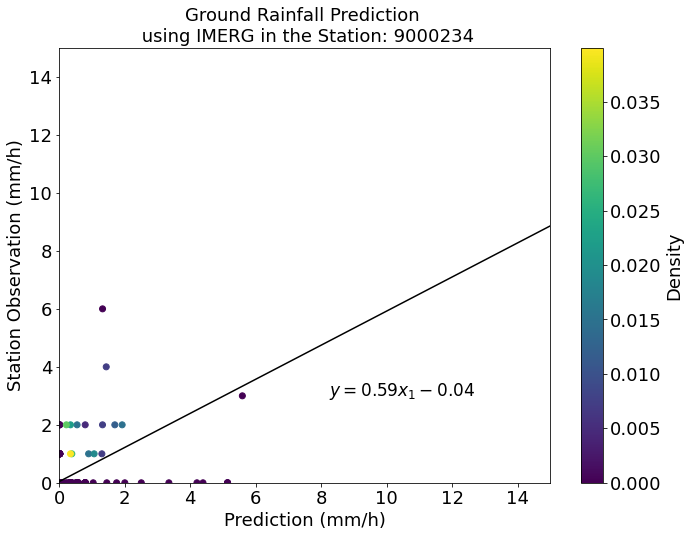

In [98]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [99]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.90745609,  -5.85569803,  -0.64158685,  -1.06533491,
        -7.23221961,  -0.48712545,  -2.03103262, -20.55356293,
        -0.65635555,  -2.92546765,  -0.71730754,  -0.98140349,
        -4.30485169,  -0.92016079,  -2.53954705,  -0.41454801,
        -4.4562065 ,  -6.03141701,  -0.12214882,  -0.30012273])

In [100]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.977 2.42  0.801 1.032 2.689 0.698 1.425 4.534 0.81  1.71  0.847 0.991
 2.075 0.959 1.594 0.644 2.111 2.456 0.349 0.548]
RMSE 평균: 1.533
제거된 0의 비율: 97.117


/tmp/ipykernel_31370/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31370/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


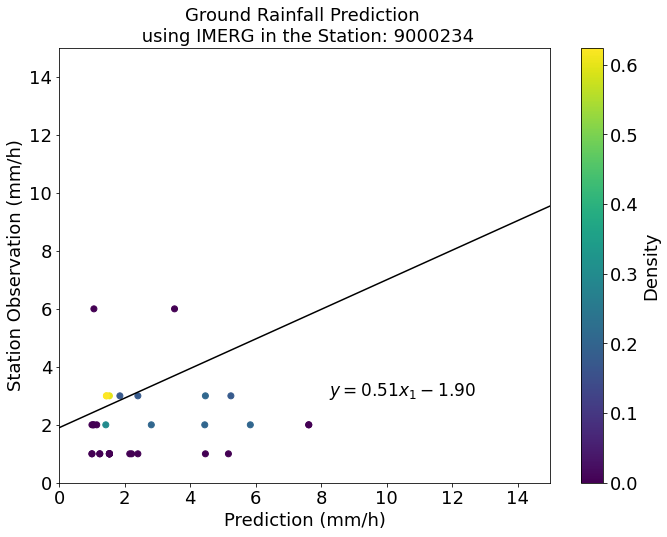

In [101]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [102]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

In [103]:
rmse_case1_all

[0.2093221777508983,
 0.2881642377799979,
 0.35552591503424147,
 0.2600381717320052,
 0.36785913593686337,
 0.31643960356077855,
 0.2575254788054584,
 0.3622055298402875,
 0.36198186701659907,
 0.3024469082727525,
 0.3912073931936888,
 0.4678222627452418]

In [104]:
rmse_case2_all

[0.8529019534356823,
 0.7849651415437108,
 0.6094938149599385,
 0.8022299112467628,
 1.0363151907513615,
 0.9757826186343982,
 0.9199664081236382,
 1.0279539691859958,
 1.003345739866263,
 0.9095204327555318,
 1.0531927236621261,
 1.5334781754395743]

In [105]:
zero_count_ratio

[96.84343434343434,
 96.21212121212122,
 94.61279461279462,
 96.88552188552188,
 97.26430976430976,
 96.8013468013468,
 96.90656565656566,
 96.04377104377105,
 97.18013468013467,
 96.84343434343434,
 96.75925925925925,
 97.11700336700336]

In [107]:
import pandas as pd
 
data = {'CASE_1_RMSE': pd.Series(rmse_case1_all,
                       index=raw_hourly_df.columns[1:13].values),
        'CASE_2_RMSE': pd.Series(rmse_case2_all,
                       index=raw_hourly_df.columns[1:13].values),
        'Zero_Ratio(%)': pd.Series(zero_count_ratio,
                       index=raw_hourly_df.columns[1:13].values)}

df = pd.DataFrame(data)
 
# Print the data
df.to_csv("rf_2월.csv")
df

,CASE_1_RMSE,CASE_2_RMSE,Zero_Ratio(%)
4001430,0.209322,0.852902,96.843434
4001440,0.288164,0.784965,96.212121
4001450,0.355526,0.609494,94.612795
4003420,0.260038,0.802230,96.885522
4007450,0.367859,1.036315,97.264310
4007470,0.316440,0.975783,96.801347
4007472,0.257525,0.919966,96.906566
4007474,0.362206,1.027954,96.043771
4009460,0.361982,1.003346,97.180135
9000140,0.302447,0.909520,96.843434
